In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [182]:
data = pd.read_csv('Mall_Customers.csv')

In [183]:
data.drop(["CustomerID"], axis = 1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [188]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


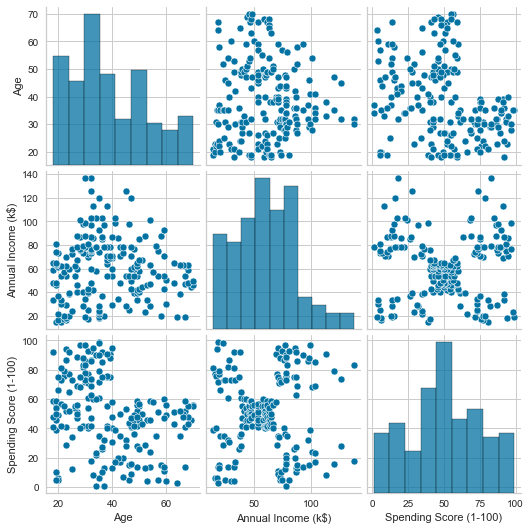

In [184]:
sns.pairplot(data)

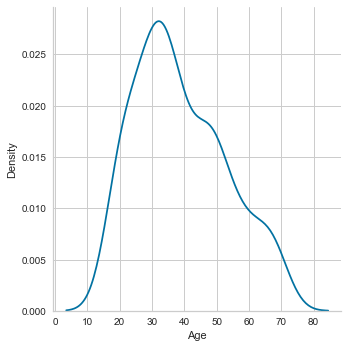

In [58]:
sns.displot(data, x="Age", kind="kde")


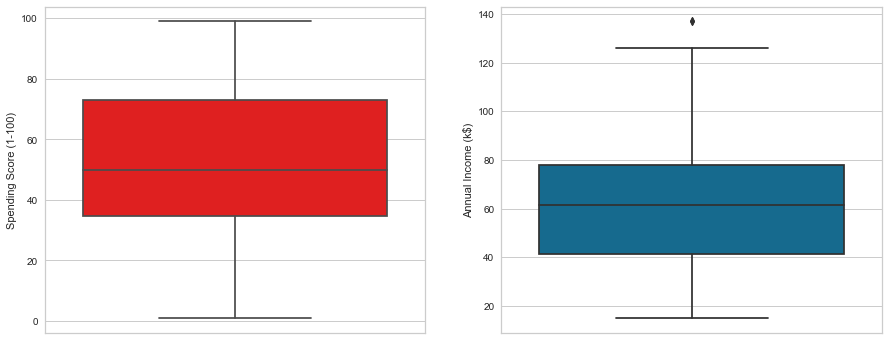

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["Annual Income (k$)"])
plt.show()

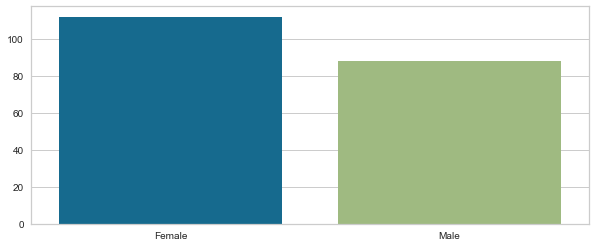

In [60]:
gender_count = data["Gender"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.show()

<AxesSubplot:xlabel='Spending Score (1-100)'>

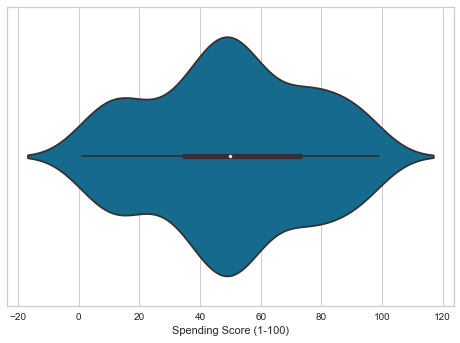

In [178]:
sns.violinplot(x=data['Spending Score (1-100)'], data=data)


In [189]:
Gender = data.pop('Gender')

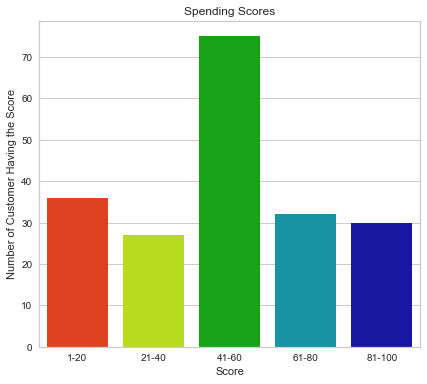

In [190]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")

plt.show()

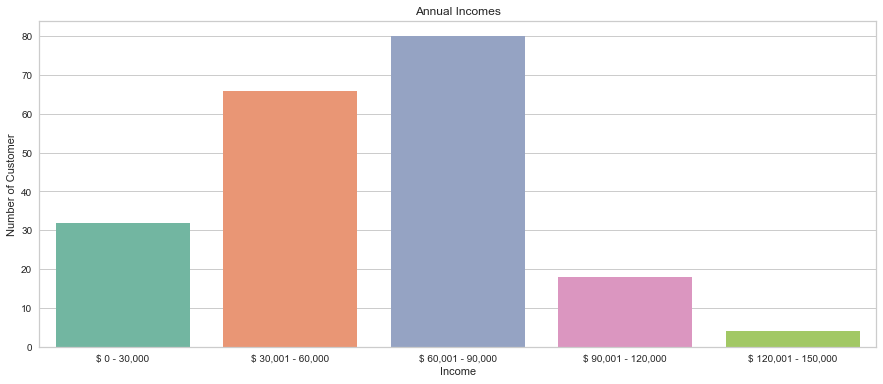

In [191]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Select number of k clusters using K-means

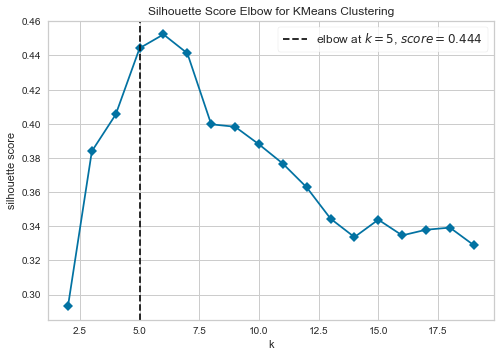

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [65]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(data)    
visualizer.poof()   

# Using K-Means for clustering

In [192]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 5,random_state=22)
clusters = k_means.fit_predict(data)
data["label"] = clusters

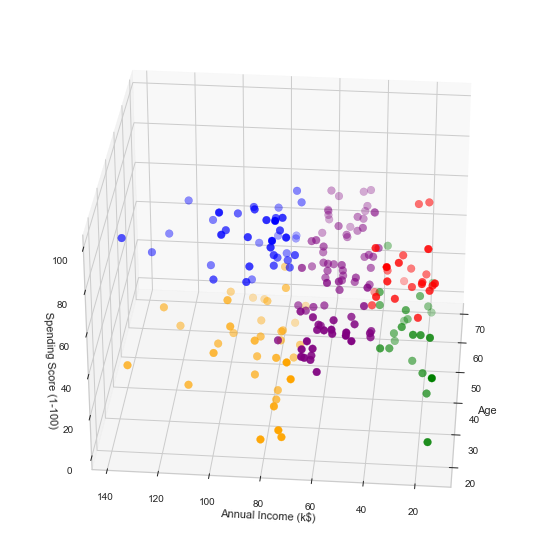

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.scatter(data.Age[data.label == 5], data["Annual Income (k$)"][data.label == 5], data["Spending Score (1-100)"][data.label == 5], c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [204]:
data['Gender'] = Gender

In [205]:
data

,Age,Annual Income (k$),Spending Score (1-100),label,Gender
0,19,15,39,2,Male
1,21,15,81,1,Male
2,20,16,6,2,Female
3,23,16,77,1,Female
4,31,17,40,2,Female
...,...,...,...,...,...
195,35,120,79,0,Female
196,45,126,28,3,Female
197,32,126,74,0,Male
198,32,137,18,3,Male


# Analyzing Clusters

In [194]:
grouped = data.groupby(by='label').mean().round(4)

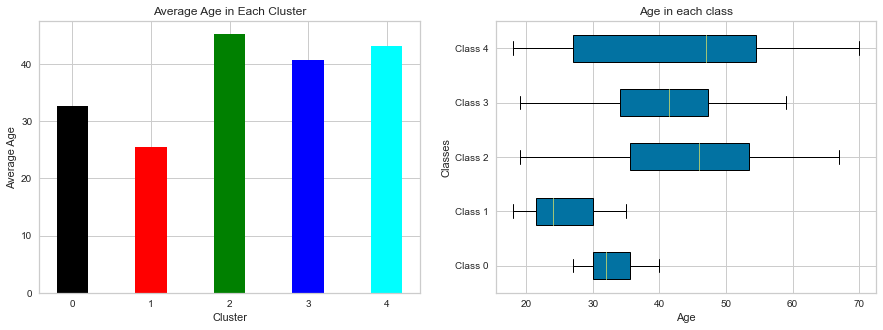

In [197]:
fig = plt.figure(figsize = (15, 5))
# creating the bar plot
plt.subplot(1,2,1)
plt.bar(grouped['Age'].to_dict().keys(), grouped['Age'].values,
        width = 0.4,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Average Age in Each Cluster")
plt.ylabel("Average Age")
plt.xlabel("Cluster")
plt.subplot(1,2,2)
age = []
for i in range(0,5):
    age.append(data[data['label']==i]['Age'].tolist())
plt.boxplot(age, vert=False, patch_artist=True, labels=['Class 0','Class 1','Class 2','Class 3','Class 4',]) 
plt.ylabel('Classes')
plt.xlabel('Age')
plt.title('Age in each class')  
plt.show()


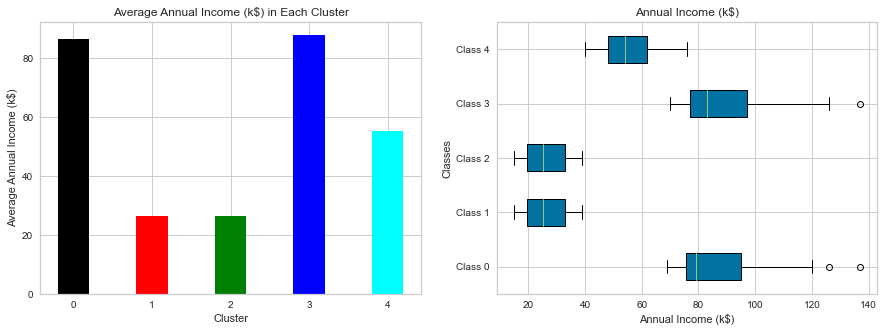

In [198]:
fig = plt.figure(figsize = (15, 5))
# creating the bar plot
plt.subplot(1,2,1)
plt.bar(grouped['Annual Income (k$)'].to_dict().keys(), grouped['Annual Income (k$)'].values,
        width = 0.4,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Average Annual Income (k$) in Each Cluster")
plt.ylabel("Average Annual Income (k$)")
plt.xlabel("Cluster")
plt.subplot(1,2,2)
income = []
for i in range(0,5):
    income.append(data[data['label']==i]['Annual Income (k$)'].tolist())
plt.boxplot(income, vert=False, patch_artist=True, labels=['Class 0','Class 1','Class 2','Class 3','Class 4',]) 
plt.ylabel('Classes')
plt.xlabel('Annual Income (k$)')
plt.title('Annual Income (k$)')  

plt.show()

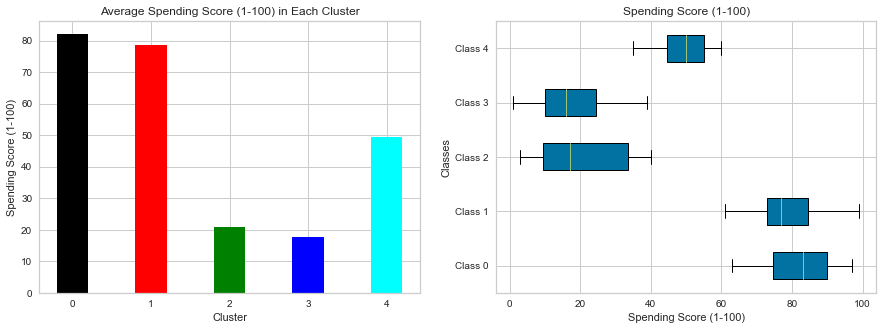

In [199]:
fig = plt.figure(figsize = (15, 5))
# creating the bar plot
plt.subplot(1,2,1)
plt.bar(grouped['Spending Score (1-100)'].to_dict().keys(), grouped['Spending Score (1-100)'].values,
        width = 0.4,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Average Spending Score (1-100) in Each Cluster")
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Cluster")
plt.subplot(1,2,2)
spending = []
for i in range(0,5):
    spending.append(data[data['label']==i]['Spending Score (1-100)'].tolist())
plt.boxplot(spending, vert=False, patch_artist=True, labels=['Class 0','Class 1','Class 2','Class 3','Class 4',]) 
plt.ylabel('Classes')
plt.xlabel('Spending Score (1-100)')
plt.title('Spending Score (1-100)')  
plt.show()

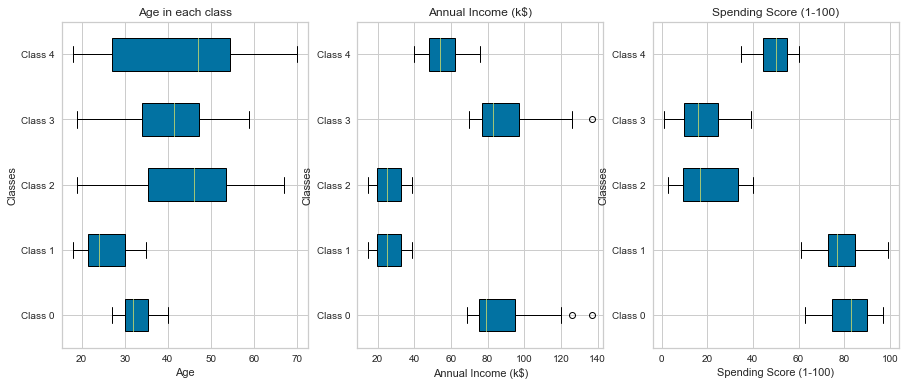

In [200]:
fig = plt.figure(figsize = (15, 6))
plt.subplot(1,3,1)
plt.boxplot(age, vert=False, patch_artist=True, labels=['Class 0','Class 1','Class 2','Class 3','Class 4',]) 
plt.ylabel('Classes')
plt.xlabel('Age')
plt.title('Age in each class')  
plt.subplot(1,3,2)
plt.boxplot(income, vert=False, patch_artist=True, labels=['Class 0','Class 1','Class 2','Class 3','Class 4',]) 
plt.ylabel('Classes')
plt.xlabel('Annual Income (k$)')
plt.title('Annual Income (k$)') 
plt.subplot(1,3,3)
plt.boxplot(spending, vert=False, patch_artist=True, labels=['Class 0','Class 1','Class 2','Class 3','Class 4',]) 
plt.ylabel('Classes')
plt.xlabel('Spending Score (1-100)')
plt.title('Spending Score (1-100)')  
plt.show()



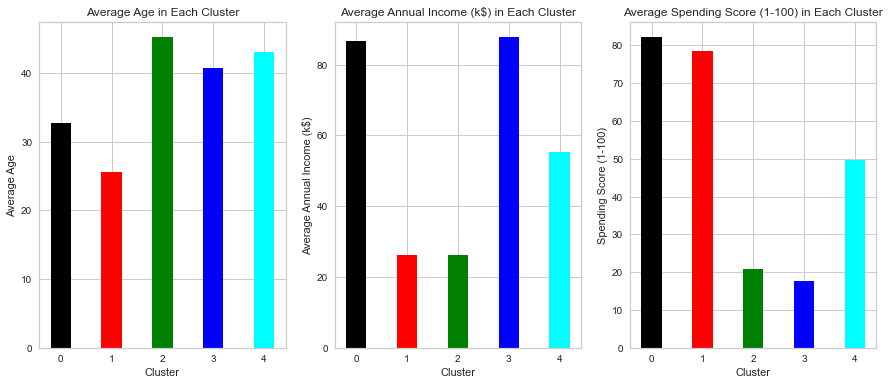

In [201]:
fig = plt.figure(figsize = (15, 6))
plt.subplot(1,3,1)
plt.bar(grouped['Age'].to_dict().keys(), grouped['Age'].values,
        width = 0.4,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Average Age in Each Cluster")
plt.ylabel("Average Age")
plt.xlabel("Cluster")
plt.subplot(1,3,2)
plt.bar(grouped['Annual Income (k$)'].to_dict().keys(), grouped['Annual Income (k$)'].values,
        width = 0.4,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Average Annual Income (k$) in Each Cluster")
plt.ylabel("Average Annual Income (k$)")
plt.xlabel("Cluster")
plt.subplot(1,3,3)
plt.bar(grouped['Spending Score (1-100)'].to_dict().keys(), grouped['Spending Score (1-100)'].values,
        width = 0.4,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Average Spending Score (1-100) in Each Cluster")
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Cluster")
plt.show()




# Analysis

## Class 0
* Mostly young and mid-age people